In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.formula.api import ols

pd.options.mode.chained_assignment = None

df = pd.read_csv('../data/raw/properties_preporcessed_1.csv')

In [2]:
df.head()

,Unnamed: 0,name,cost_text,rooms,type,cloest station,station_distance,cloest school,school_distance,CBD_distance,...,text,beds,bath,parking,Longitude,Latitude,SA2_CODE21,LOC_PID,LOC_NAME,SA2_MAIN16
0,0,1901/368 St Kilda Road Melbourne VIC 3000,$1800 Per Week,"['3 Beds', '2 Baths', '2 Parking']",Apartment / Unit / Flat,30,1803.65,1374,667.06,1702.19,...,Per Week,3,2,2,144.971027,-37.831809,206051512.0,loc9901d119afda,Melbourne,206051132.0
1,1,1211/200 Spencer Street Melbourne VIC 3000,$480 per week,"['1 Bed', '1 Bath', '1 Parking']",Apartment / Unit / Flat,176,371.68,2265,352.49,2267.13,...,per week,1,1,1,144.953247,-37.816228,206041505.0,loc9901d119afda,Melbourne,206041122.0
2,2,1008/380 Little Lonsdale Street Melbourne VIC ...,$400 pw,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,248.50,2189,401.73,1937.39,...,pw,1,1,0,144.958129,-37.812103,206041505.0,loc9901d119afda,Melbourne,206041122.0
3,3,3/27 Flinders Lane Melbourne VIC 3000,$420 per week,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,140,404.26,2193,586.61,790.13,...,per week,1,1,0,144.973365,-37.814732,206041503.0,loc9901d119afda,Melbourne,206041122.0
4,4,611/408 Lonsdale Street Melbourne VIC 3000,$350,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,525.08,2265,779.91,1657.95,...,NaN,1,1,0,144.960401,-37.812598,206041504.0,loc9901d119afda,Melbourne,206041122.0


In [20]:
df1 = df[['LOC_NAME']].groupby(df['LOC_NAME']).count().rename({'number of suburb':'counts'})

In [21]:
df1

,LOC_NAME
LOC_NAME,
Abbotsford,46
Aberfeldie,6
Aintree,18
Airport West,22
Albanvale,8
...,...
Yarram,1
Yarraville,76
Yarrawonga,14


In [5]:
df['cost_text'] = df['cost_text'].str.extract('(\d+)', expand=False).astype(int)

In [6]:
df2 = df[['name','cost_text']].groupby(df['LOC_NAME']).mean()

In [7]:
df2.sort_values(['cost_text'],ascending=False)

,cost_text
LOC_NAME,
Portsea,16866.666667
Beaumaris,4660.454545
Skenes Creek,3850.000000
Merriang,2800.000000
Flinders,2425.000000
...,...
Natimuk,200.000000
Watchem,200.000000
Nichols Point,195.000000


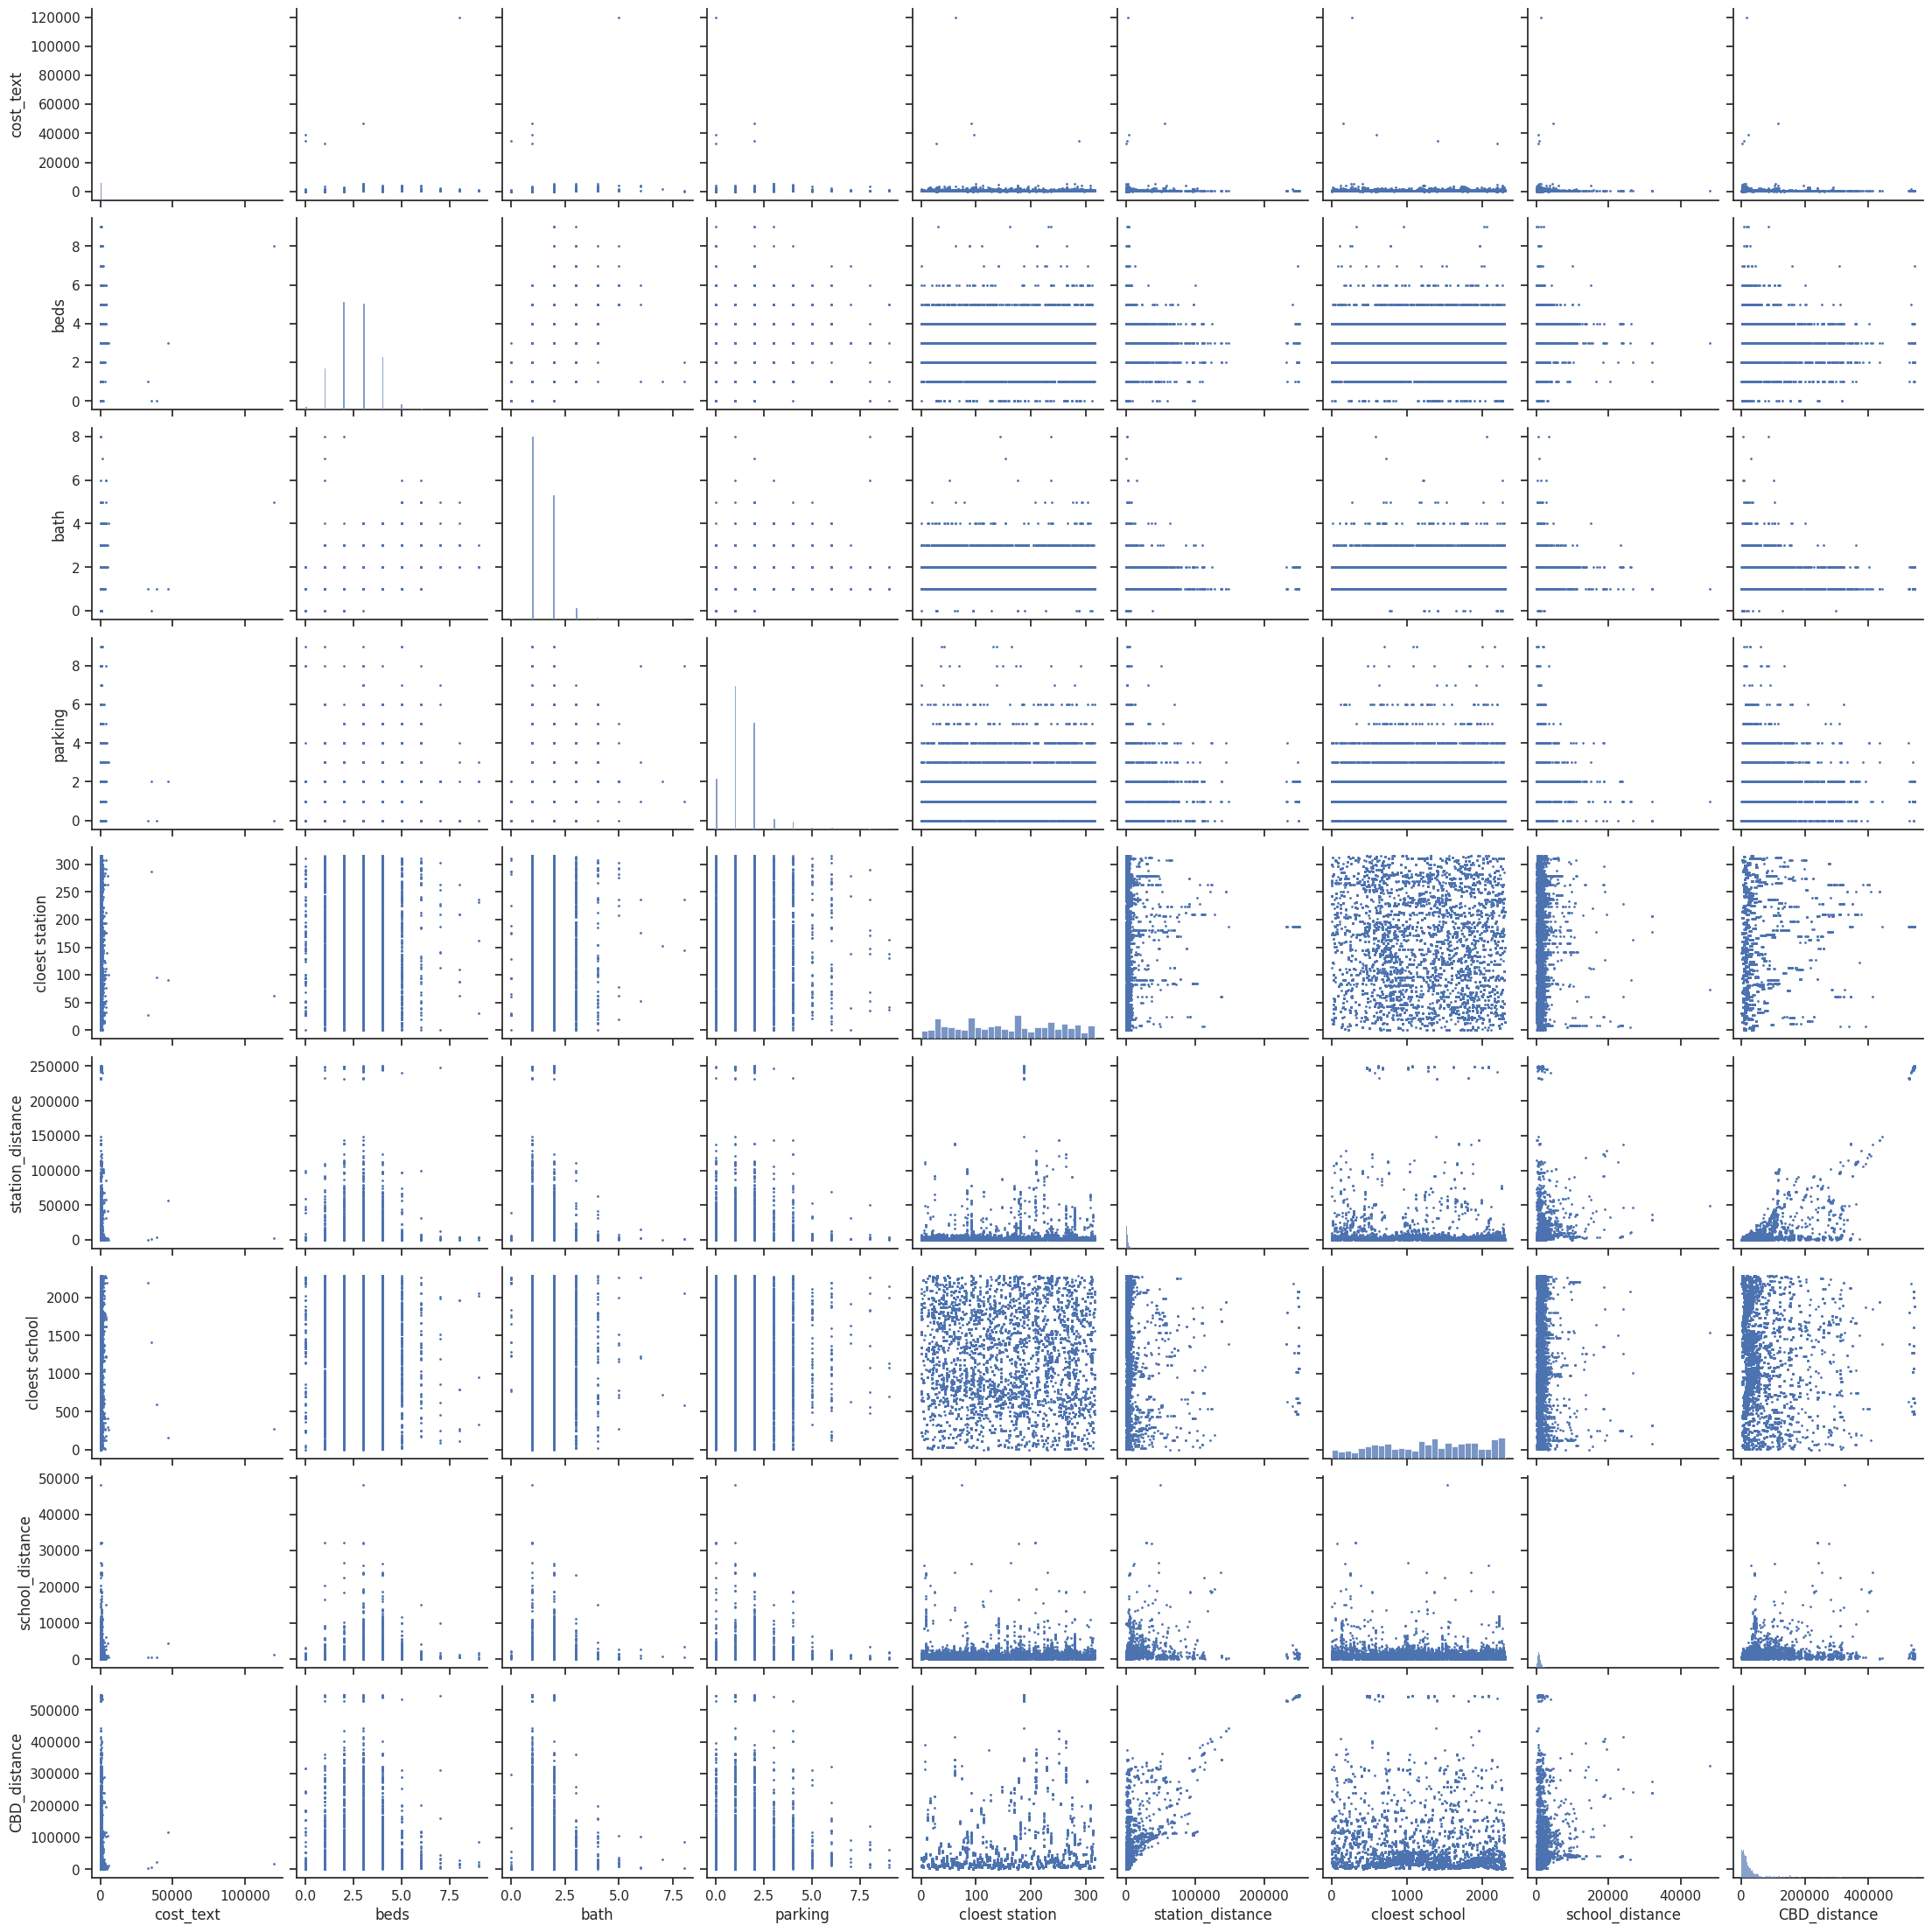

In [13]:
COL_FITTER = ['cost_text','beds','bath','parking','cloest station',	'station_distance',	'cloest school',	'school_distance',	'CBD_distance'] # Select features 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[COL_FITTER], plot_kws=dict(s=1, edgecolor="b", linewidth=1))


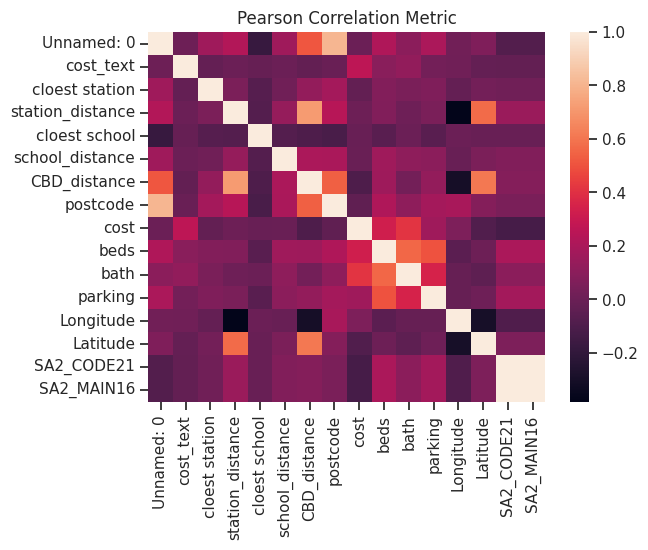

In [14]:
sns.heatmap(df.corr())
plt.title('Pearson Correlation Metric')
plt.show()

In [22]:
df3 = df[['cost_text']].groupby(df['type']).count()

In [23]:
df3

,cost_text
type,
Acreage / Semi-Rural,13
Apartment / Unit / Flat,5828
Carspace,6
Duplex,6
House,7062
New Apartments / Off the Plan,5
New House & Land,1
Penthouse,1
Rural,1


In [27]:
df4 = df[(df.type == 'Apartment / Unit / Flat'	)]

In [30]:
df5 = df[(df.type == 'House')]

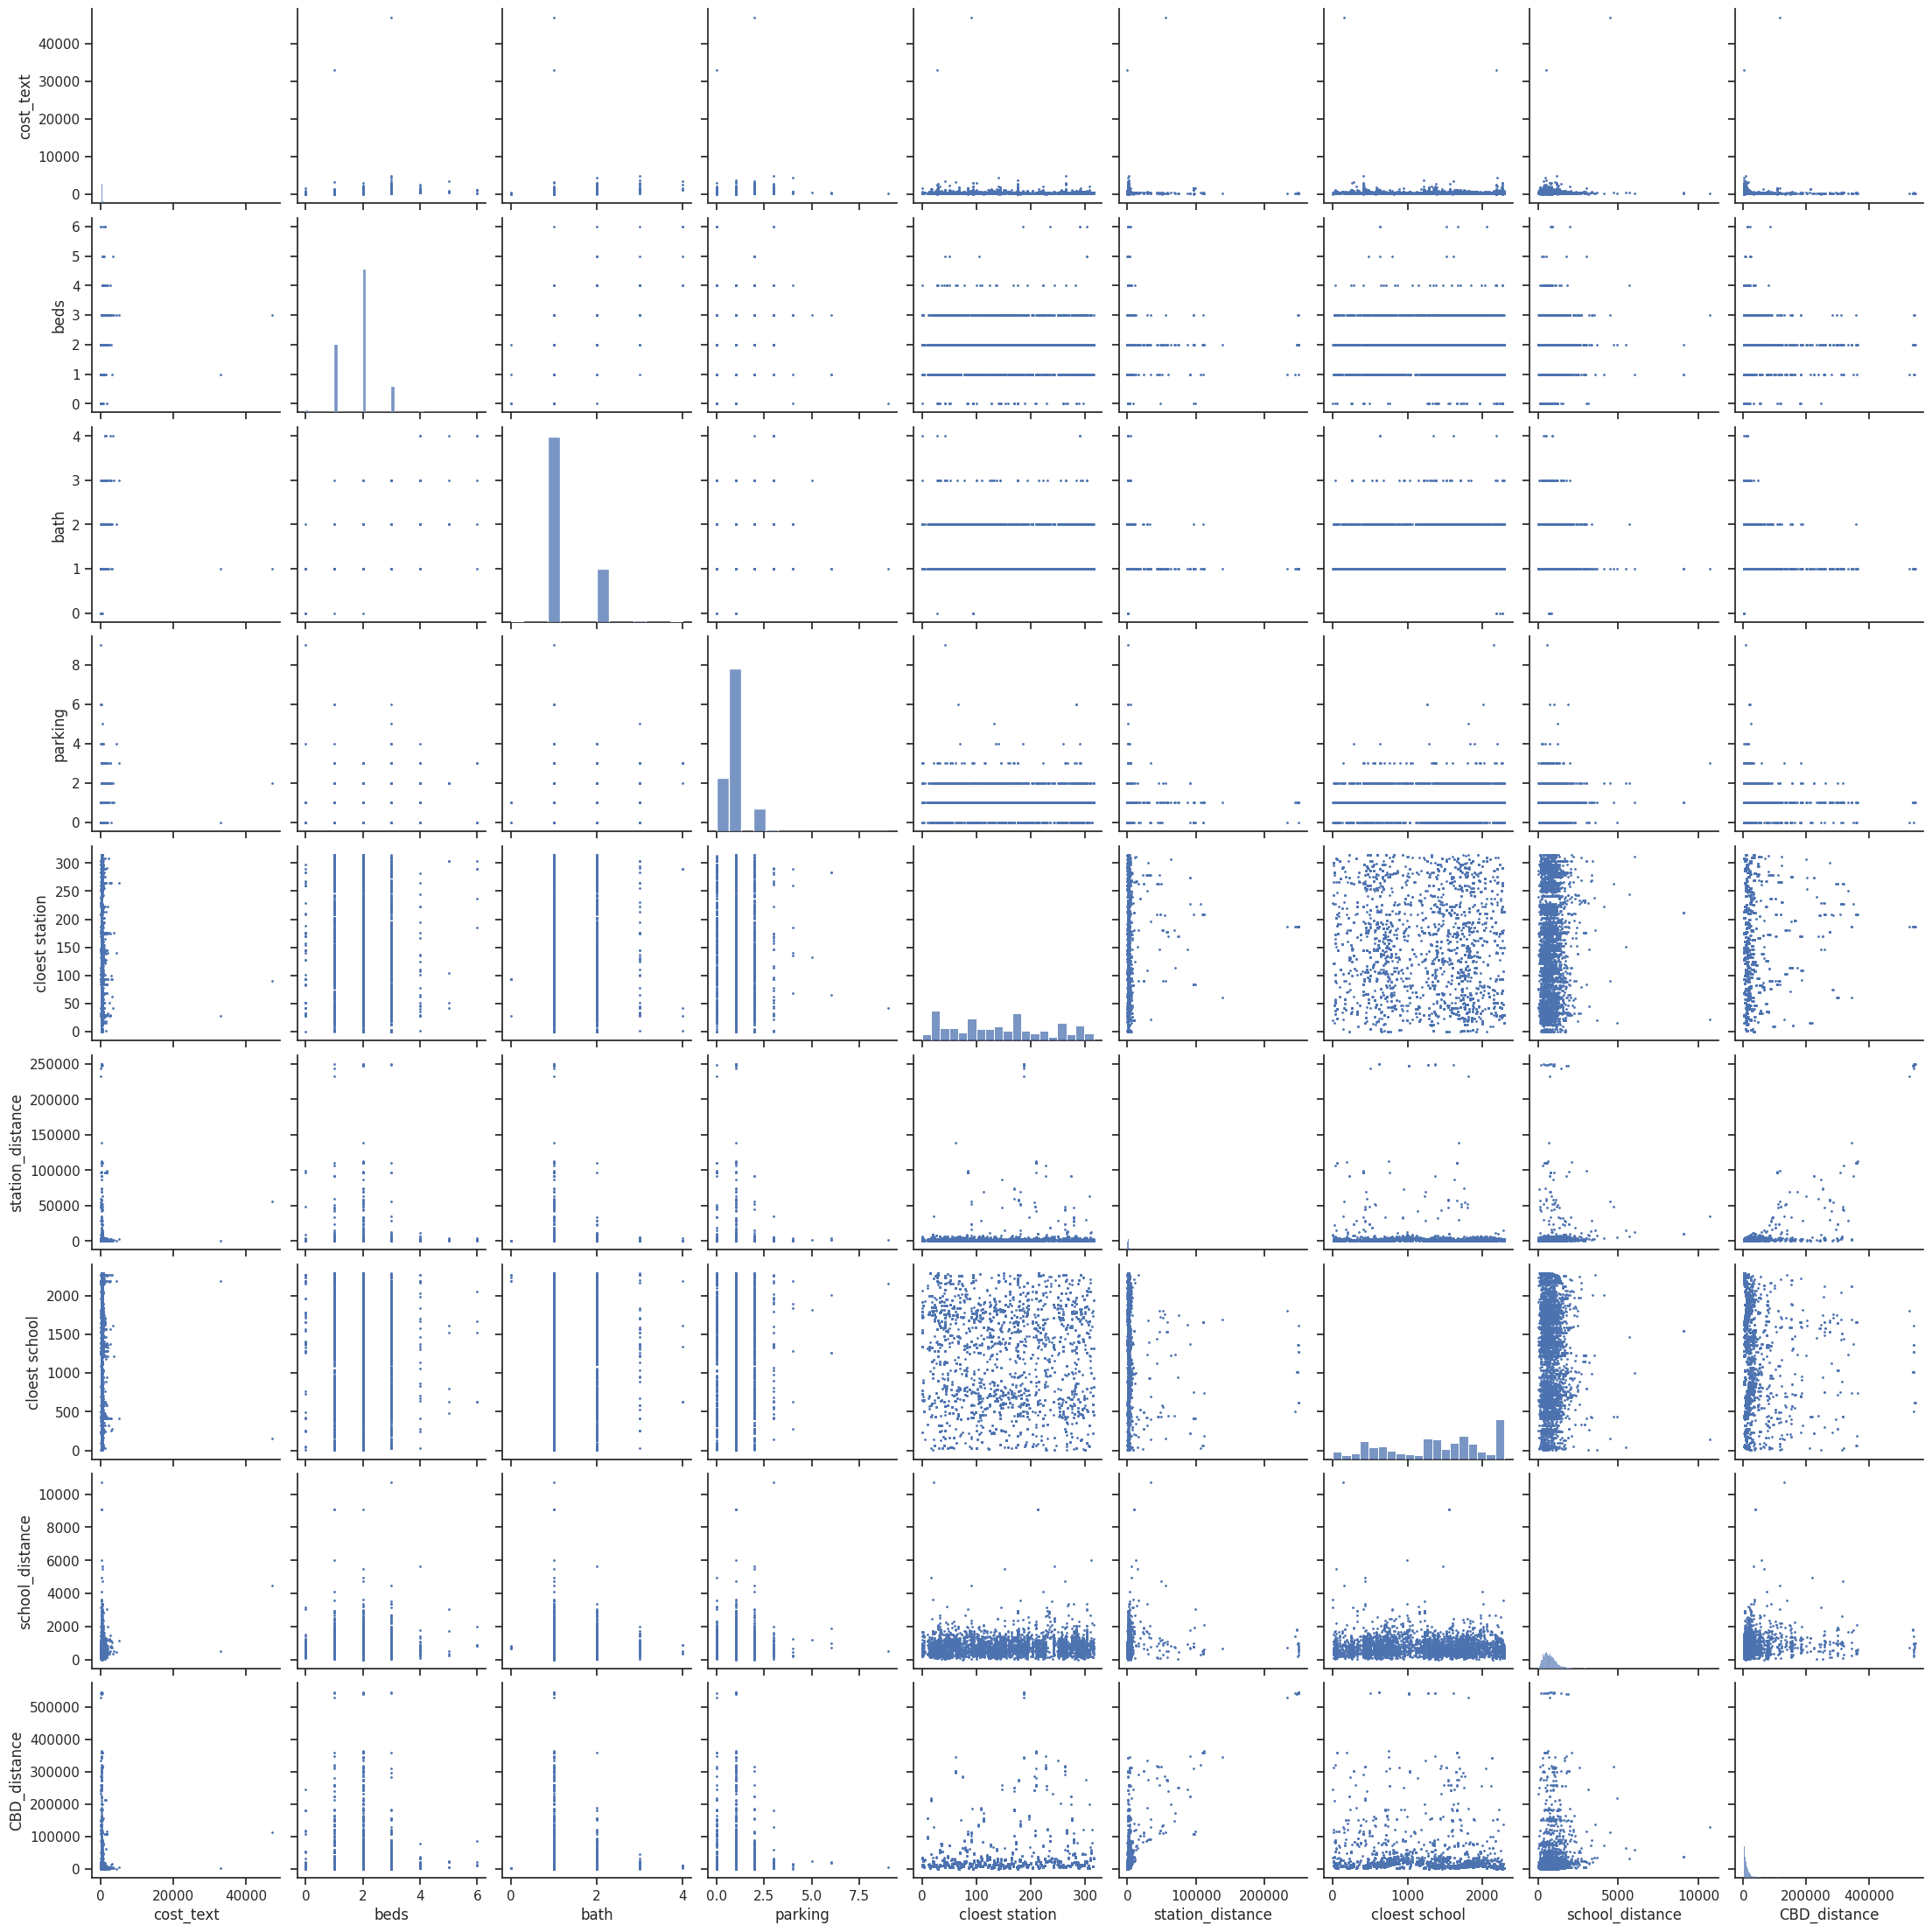

In [29]:
g1 = sns.pairplot(df4[COL_FITTER], plot_kws=dict(s=1, edgecolor="b", linewidth=1)) # Scatter plot of properties when type is Apartment

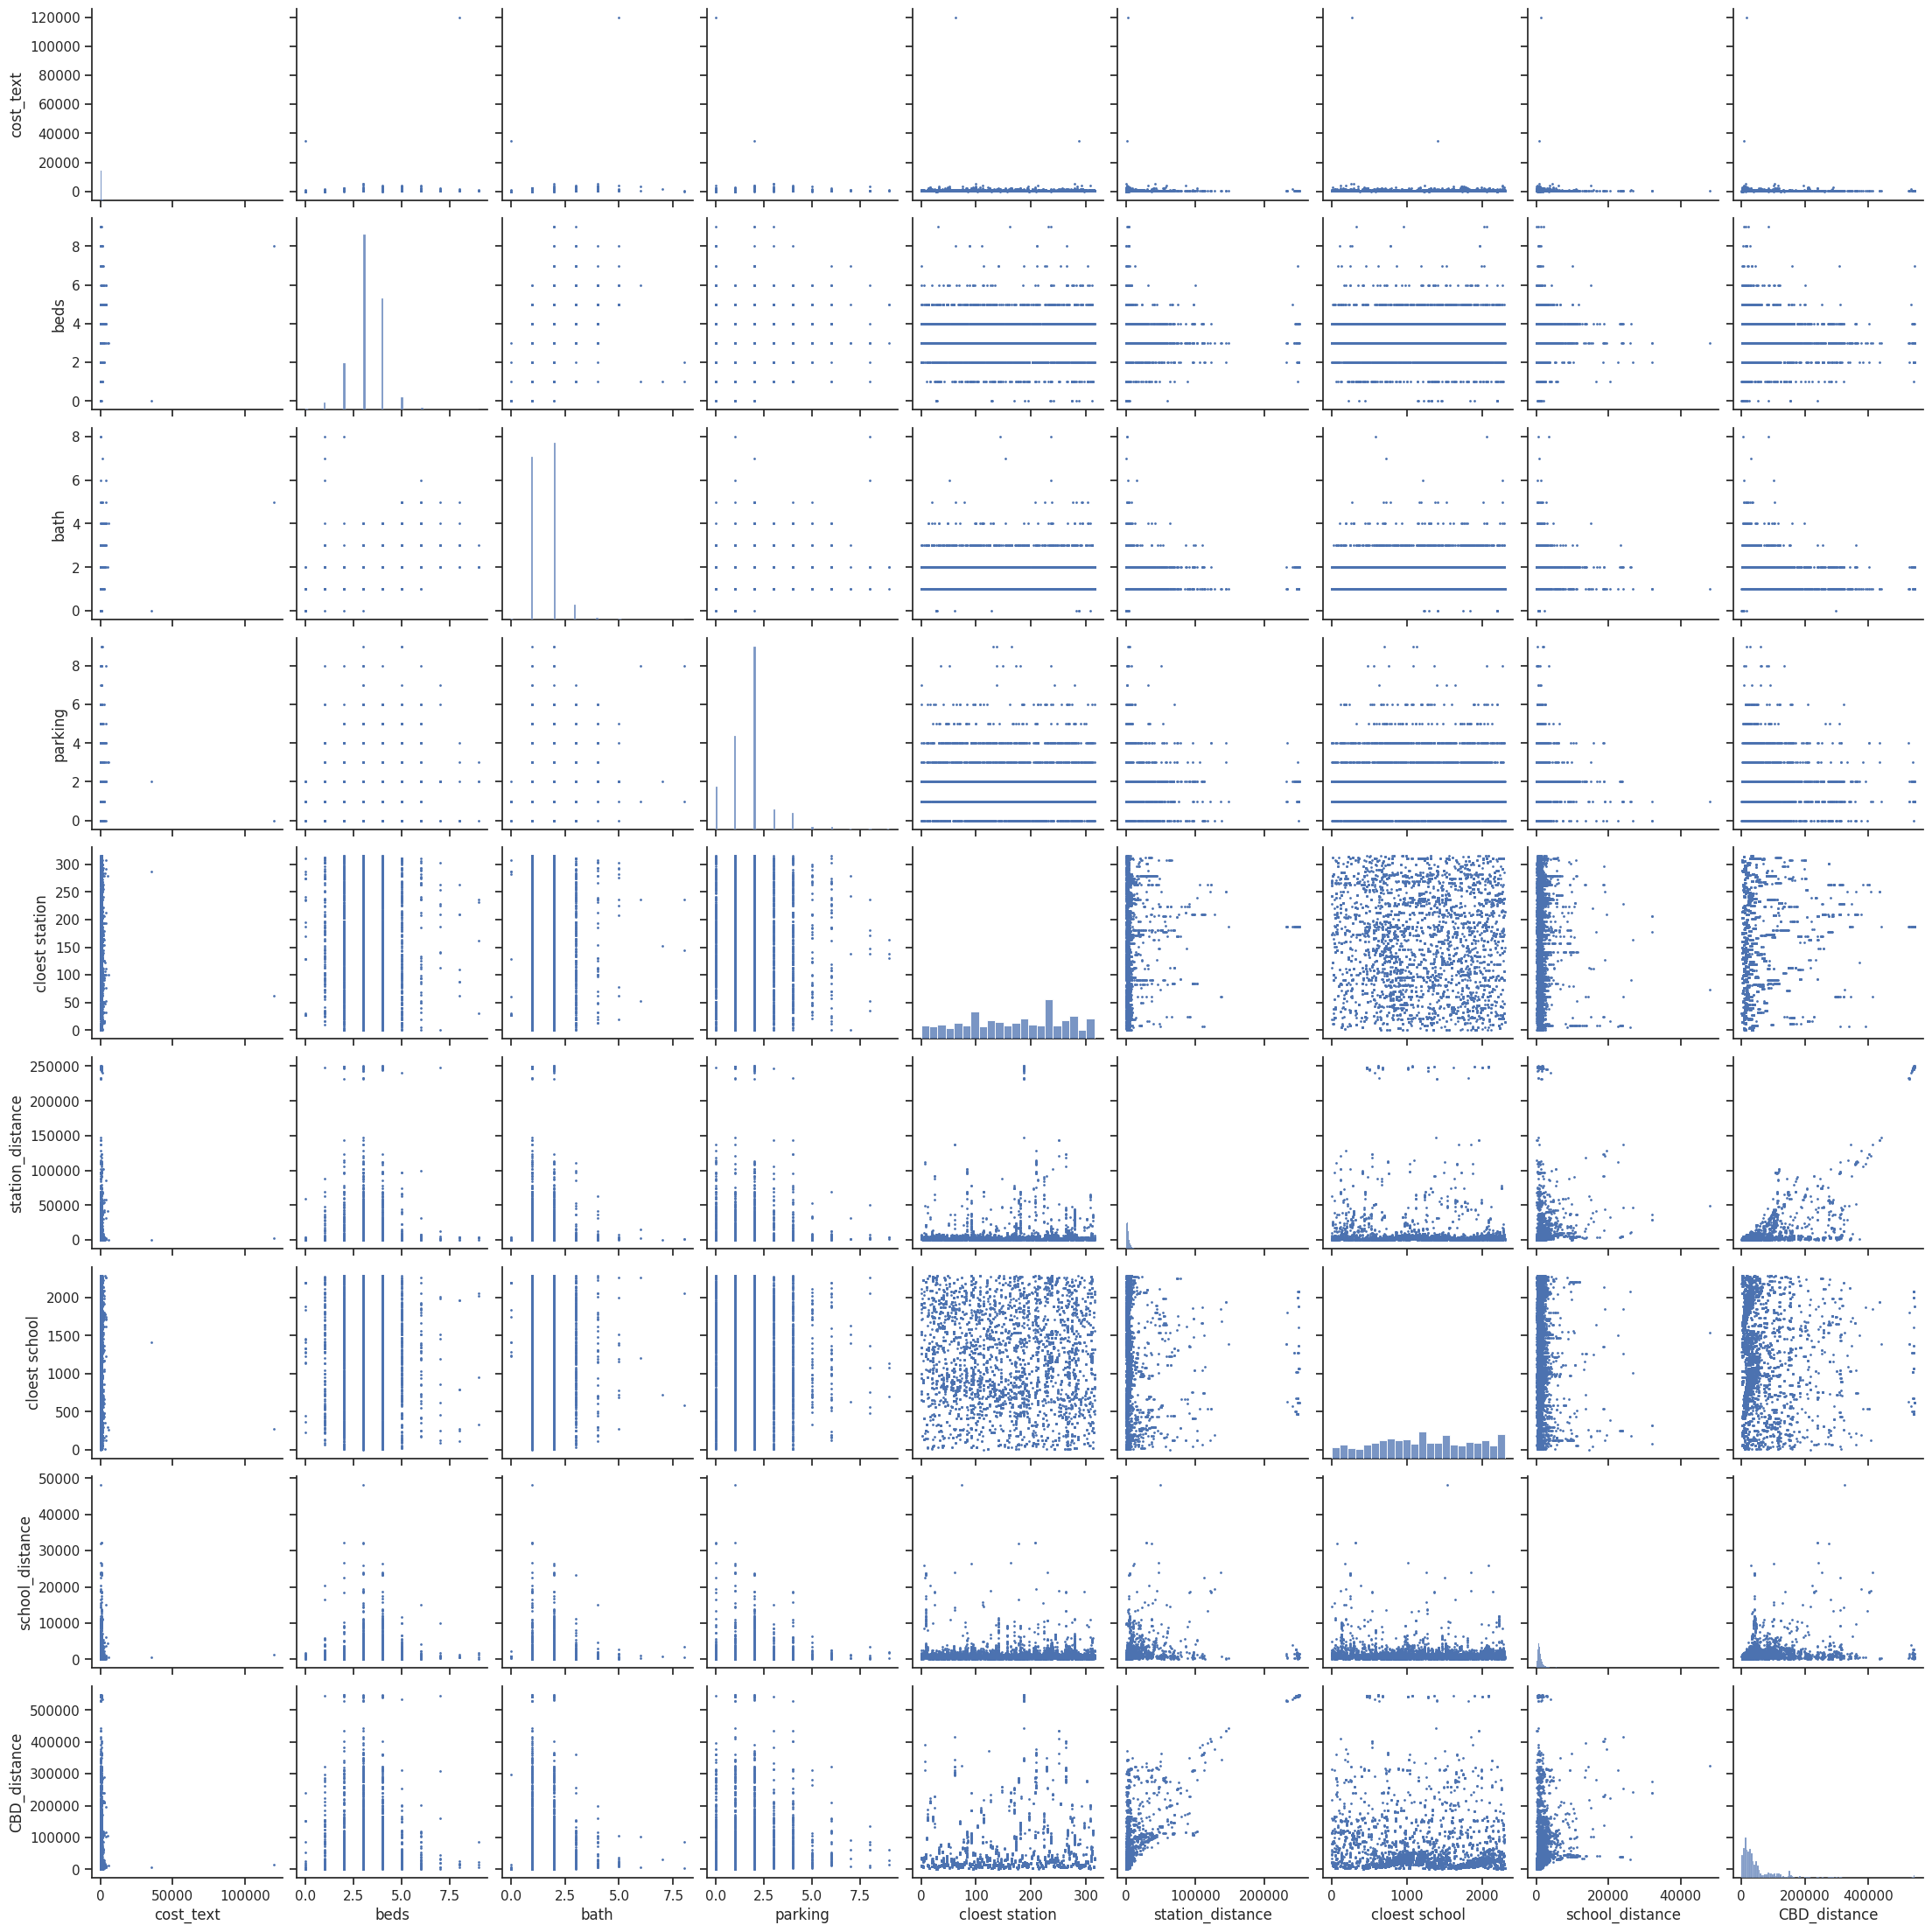

In [31]:
g2 = sns.pairplot(df5[COL_FITTER], plot_kws=dict(s=1, edgecolor="b", linewidth=1)) # Scatter plot of properties when type is House

In [49]:
COL = ['cost_text', 'station_distance', 'school_distance']
Q1 = df[COL].quantile(0.25)
Q3 = df[COL].quantile(0.75)
IQR = Q3 - Q1
df6 = df[~((df[COL] < (Q1 - 1.5 * IQR)) | (df[COL] > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost_text', ylabel='Density'>

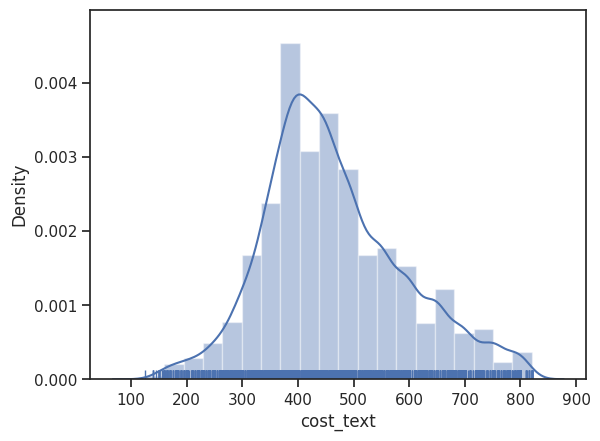

In [55]:
sns.distplot(df6['cost_text'],kde = True, bins=20, rug = True) # distribution of cost_text

In [61]:
COL = ['cost_text']
Q1 = df2[COL].quantile(0.25)
Q3 = df2[COL].quantile(0.75)
IQR = Q3 - Q1
df7 = df2[~((df2[COL] < (Q1 - 1.5 * IQR)) | (df2[COL] > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost_text', ylabel='Density'>

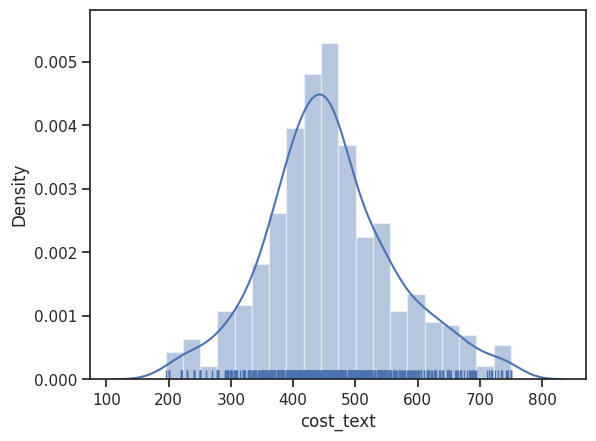

In [62]:
sns.distplot(df7['cost_text'],kde = True, bins=20, rug = True) # distribution for mean of cost_text in each suburb

(array([2327., 3267., 2278., 1324.,  918.,  710.,  446.,  338.,  199.,
         188.]),
 array([  10.06 ,  665.052, 1320.044, 1975.036, 2630.028, 3285.02 ,
        3940.012, 4595.004, 5249.996, 5904.988, 6559.98 ]),
 <BarContainer object of 10 artists>)

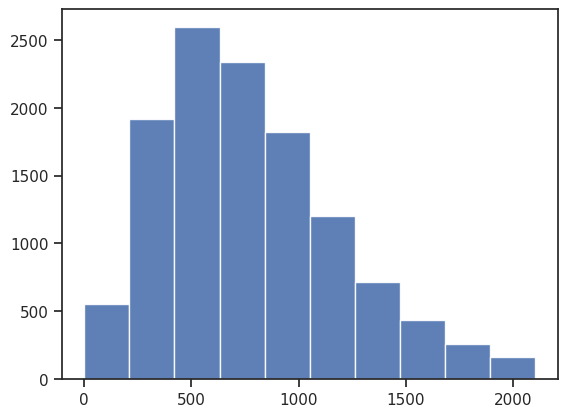

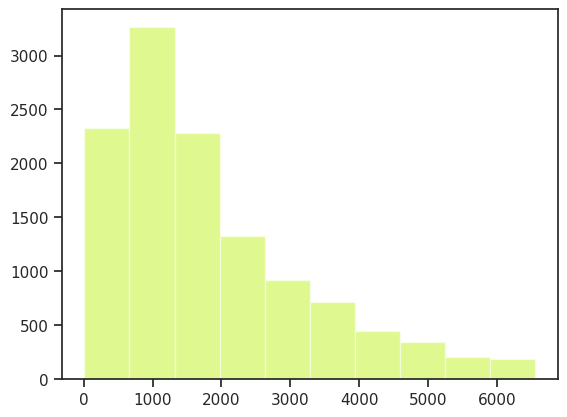

In [56]:
plt.hist(df6.school_distance,  alpha=.9)

plt.figure()

plt.hist(df6.station_distance,  color="#C1F320", alpha=.5)

(array([2327., 3267., 2278., 1324.,  918.,  710.,  446.,  338.,  199.,
         188.]),
 array([  10.06 ,  665.052, 1320.044, 1975.036, 2630.028, 3285.02 ,
        3940.012, 4595.004, 5249.996, 5904.988, 6559.98 ]),
 <BarContainer object of 10 artists>)

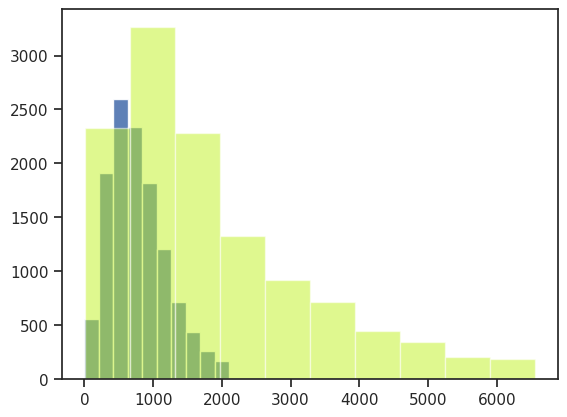

In [57]:
plt.hist(df6.school_distance,  alpha=.9)

plt.hist(df6.station_distance, color="#C1F320", alpha=.5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='school_distance', ylabel='station_distance'>

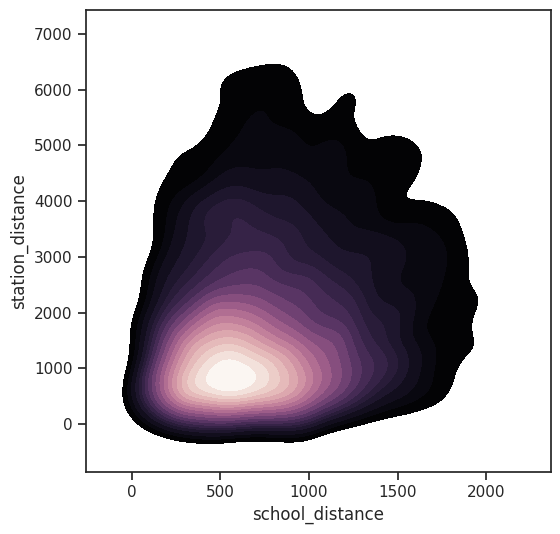

In [58]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df6.school_distance, df6.station_distance, cmap=cmap, n_levels=20, shade=True) #kdeplot()